Loading cleansed IDs from lpd_5/cleansed_ids.txt...
Loaded 21,425 unique MSD IDs

Processing Last.fm Dataset folder: lpd_5/labels/lastfm
    00s: 1453 songs
    60s: 1140 songs
    70s: 1579 songs
    80s: 2328 songs
    90s: 1984 songs
    acoustic: 768 songs
    alternative: 2076 songs
    amazing: 763 songs
    ambient: 413 songs
    american: 1814 songs
    awesome: 1733 songs
    beautiful: 2205 songs
    blues: 620 songs
    british: 1448 songs
    catchy: 1496 songs
    chill: 1257 songs
    chillout: 1314 songs
    classic: 1668 songs
    cool: 1322 songs
    country: 911 songs
    cover: 730 songs
    dance: 2904 songs
    downtempo: 316 songs
    electro: 488 songs
    electronic: 1768 songs
    electronica: 878 songs
    experimental: 213 songs
    favorite: 1475 songs
    favorites: 3339 songs
    favourite: 1443 songs
    favourites: 1624 songs
    female: 1051 songs
    folk: 669 songs
    fun: 1253 songs
    funk: 742 songs
    guitar: 912 songs
    happy: 1230 songs
   

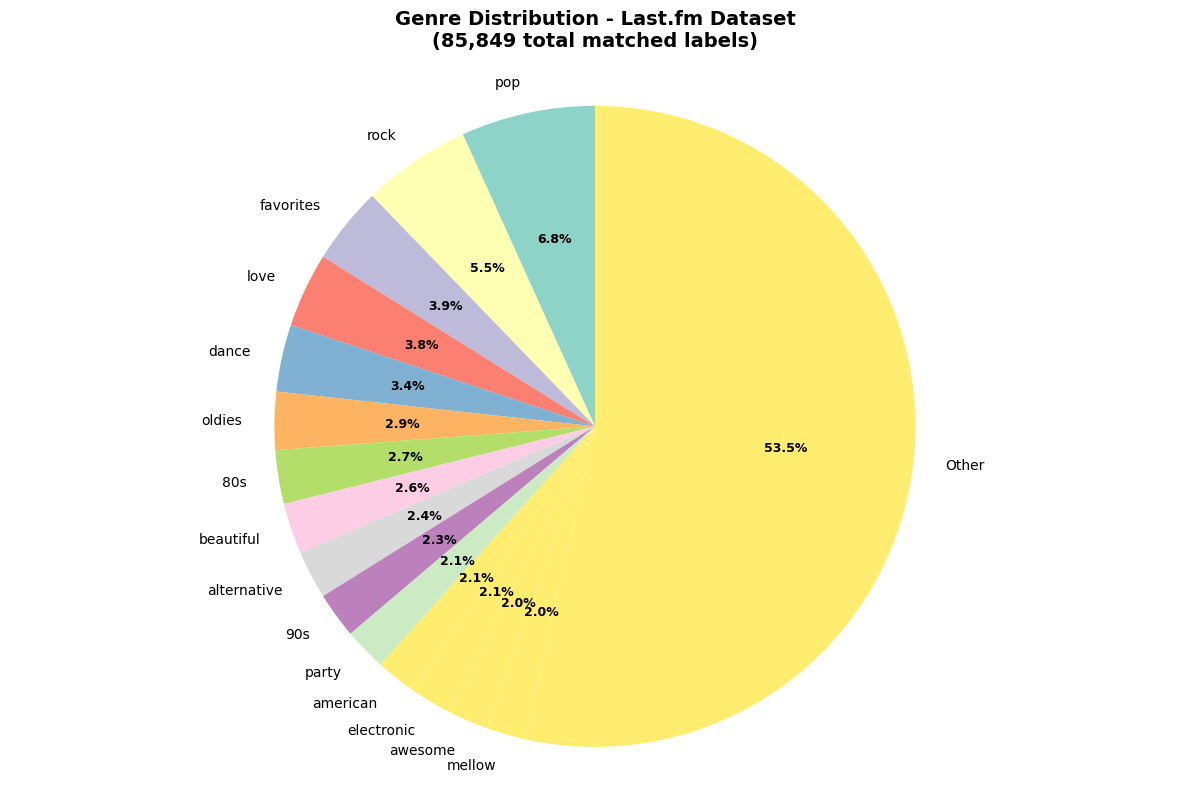


Last.fm Dataset Summary:
  Total songs with genre labels: 85,849
  Number of different genres: 66
  Top 5 genres:
    1. pop: 5,808 songs (6.8%)
    2. rock: 4,693 songs (5.5%)
    3. favorites: 3,339 songs (3.9%)
    4. love: 3,227 songs (3.8%)
    5. dance: 2,904 songs (3.4%)

Processing Million Song Dataset Benchmarks folder: lpd_5/labels/amg
    Blues: 22 songs
    Country: 512 songs
    Electronic: 889 songs
    Folk: 45 songs
    International: 206 songs
    Jazz: 157 songs
    Latin: 360 songs
    New-Age: 67 songs
    Pop_Rock: 4345 songs
    Rap: 164 songs
    Reggae: 45 songs
    RnB: 397 songs
    Vocal: 114 songs

  Total unique songs with labels: 7323 out of 21425 (34.2%)
Saved chart: genre_charts\million_song_dataset_benchmarks_genre_distribution.png


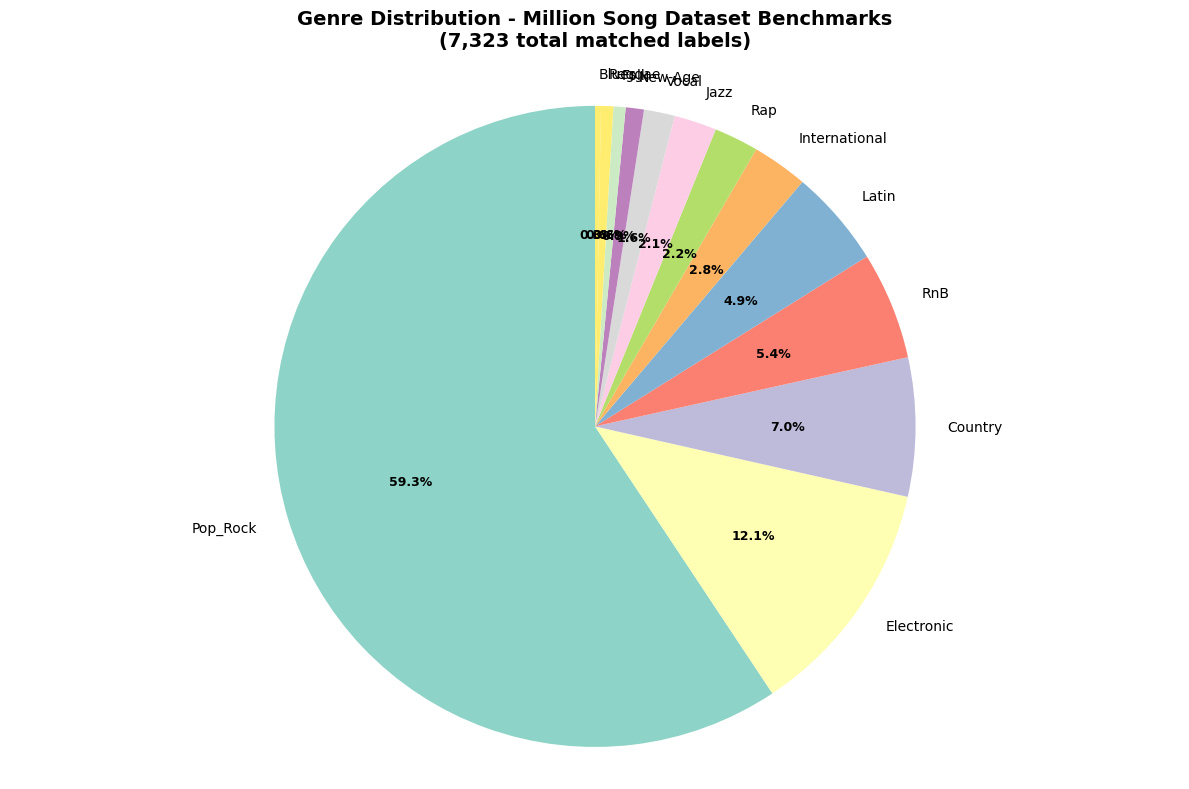


Million Song Dataset Benchmarks Summary:
  Total songs with genre labels: 7,323
  Number of different genres: 13
  Top 5 genres:
    1. Pop_Rock: 4,345 songs (59.3%)
    2. Electronic: 889 songs (12.1%)
    3. Country: 512 songs (7.0%)
    4. RnB: 397 songs (5.4%)
    5. Latin: 360 songs (4.9%)

Processing Tagtraum Genre Annotations folder: lpd_5/labels/tagtraum
    Blues: 19 songs
    Country: 448 songs
    Electronic: 352 songs
    Folk: 33 songs
    Jazz: 127 songs
    Latin: 70 songs
    Metal: 112 songs
    New-Age: 29 songs
    Pop: 1086 songs
    Punk: 12 songs
    Rap: 89 songs
    Reggae: 53 songs
    RnB: 264 songs
    Rock: 1668 songs
    World: 10 songs

  Total unique songs with labels: 4372 out of 21425 (20.4%)
Saved chart: genre_charts\tagtraum_genre_annotations_genre_distribution.png


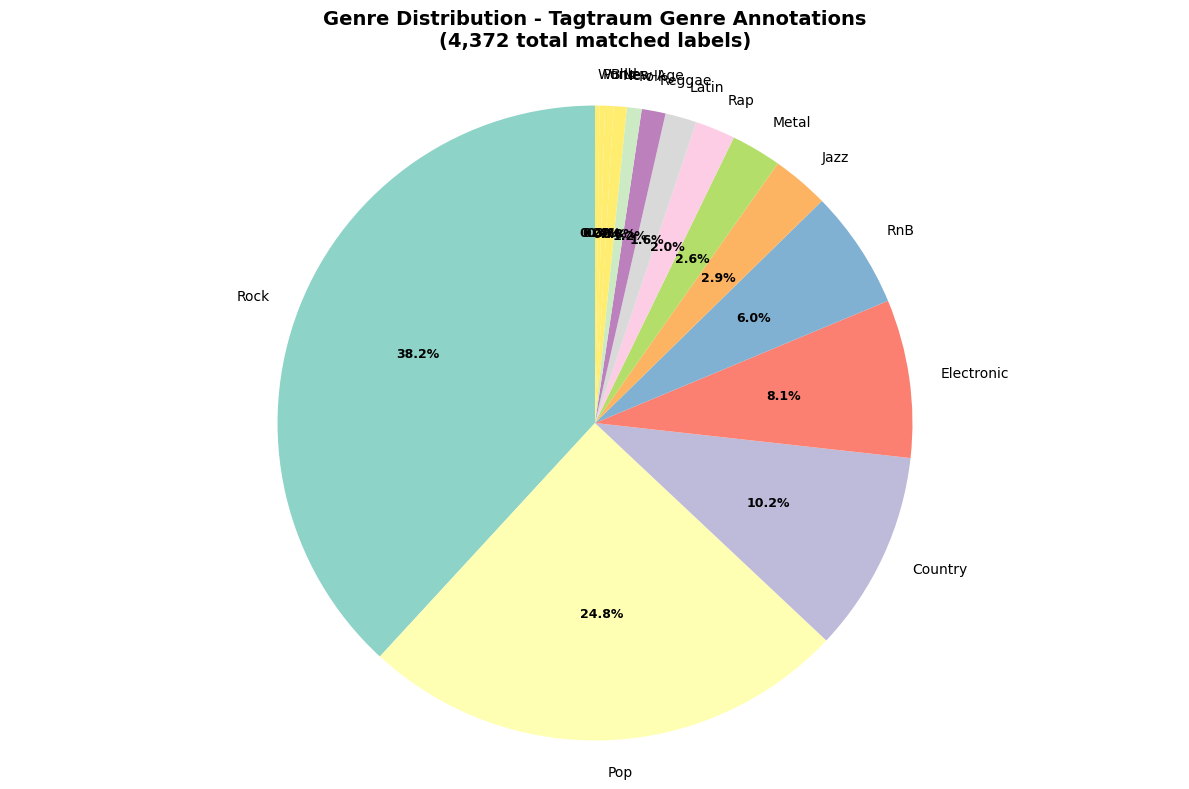


Tagtraum Genre Annotations Summary:
  Total songs with genre labels: 4,372
  Number of different genres: 15
  Top 5 genres:
    1. Rock: 1,668 songs (38.2%)
    2. Pop: 1,086 songs (24.8%)
    3. Country: 448 songs (10.2%)
    4. Electronic: 352 songs (8.1%)
    5. RnB: 264 songs (6.0%)


In [15]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import glob

def load_cleansed_ids(cleansed_ids_file):
    """
    Load the cleansed_ids.txt file and create a set of MSD IDs for fast lookup.
    
    Args:
        cleansed_ids_file (str): Path to cleansed_ids.txt file
        
    Returns:
        set: Set of Million Song Dataset IDs for O(1) lookup
    """
    print(f'Loading cleansed IDs from {cleansed_ids_file}...')
    msd_ids = set()
    
    with open(cleansed_ids_file, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f, 1):
            if line_num % 100000 == 0:  # Progress indicator
                print(f'  Processed {line_num:,} lines...')
                
            line = line.strip()
            if line:
                parts = line.split()
                if len(parts) >= 2:
                    msd_id = parts[1].strip()
                    if msd_id.startswith('TR') and len(msd_id) == 18:
                        msd_ids.add(msd_id)
    
    print(f'Loaded {len(msd_ids):,} unique MSD IDs')
    return msd_ids

def process_label_provider_folder(folder_path, msd_ids_set, provider_name):
    """
    Process a label provider folder and count genre occurrences for our songs.
    
    Args:
        folder_path (str): Path to the label provider folder
        msd_ids_set (set): Set of our MSD IDs for fast lookup
        provider_name (str): Name of the label provider for display
        
    Returns:
        dict: Genre counts for our songs
    """
    print(f'\nProcessing {provider_name} folder: {folder_path}')
    
    genre_counts = defaultdict(int)
    id_list_files = glob.glob(os.path.join(folder_path, 'id_list_*.txt'))
    
    if not id_list_files:
        print(f'  No id_list_*.txt files found in {folder_path}')
        return genre_counts
    
    labeled_songs = set()  # Track unique songs that have at least one label
    for file_path in id_list_files:
        # Extract genre name from filename
        filename = os.path.basename(file_path)
        genre = filename.replace('id_list_', "").replace('.txt', "")

        # Count how many of our songs are in this genre
        count = 0
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    msd_id = line.strip()
                    if msd_id in msd_ids_set:
                        count += 1
                        labeled_songs.add(msd_id)  # Add to set of labeled songs

            if count > 0:
                genre_counts[genre] = count
                print(f'    {genre}: {count} songs')

        except Exception as e:
            print(f'    Error processing {file_path}: {e}')

    print(f'\n  Total unique songs with labels: {len(labeled_songs)} out of {len(msd_ids_set)} ({len(labeled_songs)/len(msd_ids_set)*100:.1f}%)')
    return dict(genre_counts)



def create_pie_chart(genre_counts, provider_name, output_dir='genre_charts'):
    """
    Create a pie chart for genre distribution.
    
    Args:
        genre_counts (dict): Genre counts
        provider_name (str): Name of the label provider
        output_dir (str): Output directory for charts
    """
    if not genre_counts:
        print(f'No data to plot for {provider_name}')
        return
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Sort genres by count (descending) for better visualization
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Limit to top genres if there are too many (optional)
    max_genres = 15
    if len(sorted_genres) > max_genres:
        top_genres = sorted_genres[:max_genres]
        other_count = sum(count for _, count in sorted_genres[max_genres:])
        if other_count > 0:
            top_genres.append(('Other', other_count))
        sorted_genres = top_genres
    
    genres, counts = zip(*sorted_genres)
    total_songs = sum(counts)
    
    # Create pie chart
    plt.figure(figsize=(12, 8))
    colors = plt.cm.Set3(range(len(genres)))
    
    wedges, texts, autotexts = plt.pie(
        counts, 
        labels=genres, 
        autopct='%1.1f%%',
        colors=colors,
        startangle=90
    )
    
    # Improve text formatting
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(9)
        autotext.set_weight('bold')
    
    for text in texts:
        text.set_fontsize(10)
    
    plt.title(f'Genre Distribution - {provider_name}\n({total_songs:,} total matched labels)',
              fontsize=14, fontweight='bold', pad=20)
    
    plt.axis('equal')
    plt.tight_layout()
    
    # Save the chart
    output_file = os.path.join(output_dir, f'{provider_name.replace(" ", "_").lower()}_genre_distribution.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f'Saved chart: {output_file}')
    
    # Also show the chart
    plt.show()
    
    # Print summary statistics
    print(f'\n{provider_name} Summary:')
    print(f'  Total songs with genre labels: {total_songs:,}')
    print(f'  Number of different genres: {len(genre_counts)}')
    print(f'  Top 5 genres:')
    for i, (genre, count) in enumerate(sorted_genres[:5], 1):
        percentage = (count / total_songs) * 100
        print(f'    {i}. {genre}: {count:,} songs ({percentage:.1f}%)')


def analyze_genre_distributions(cleansed_ids_file, label_provider_folders):
    """
    Main function to analyze genre distributions across label providers.
    
    Args:
        cleansed_ids_file (str): Path to cleansed_ids.txt
        label_provider_folders (dict): Dictionary mapping provider names to folder paths
    """
    # Load our song IDs for fast lookup
    msd_ids_set = load_cleansed_ids(cleansed_ids_file)
    
    if not msd_ids_set:
        print('No valid MSD IDs found in cleansed_ids.txt')
        return
    
    # Process each label provider
    for provider_name, folder_path in label_provider_folders.items():
        if not os.path.exists(folder_path):
            print(f'Warning: Folder {folder_path} does not exist, skipping {provider_name}')
            continue
            
        # Count genres for this provider
        genre_counts = process_label_provider_folder(folder_path, msd_ids_set, provider_name)
        
        # Create pie chart
        create_pie_chart(genre_counts, provider_name)

# Configuration
cleansed_ids_file = 'lpd_5/cleansed_ids.txt'  # Path to your cleansed_ids.txt file

# Define your label provider folders
label_provider_folders = {
    'Last.fm Dataset': 'lpd_5/labels/lastfm',
    'Million Song Dataset Benchmarks': 'lpd_5/labels/amg',
    'Tagtraum Genre Annotations': 'lpd_5/labels/tagtraum'
}

# Run the analysis
analyze_genre_distributions(cleansed_ids_file, label_provider_folders)